# SageMaker Model Monitor - visualizing monitoring results


The prebuilt container from SageMaker computes a variety of statistics and evaluates constraints out of the box. This notebook demonstrates how you can visualize them. You can grab the ProcessingJob arn from the executions behind a MonitoringSchedule and use this notebook to visualize the results.

Let's import some python libraries that will be helpful for visualization

In [19]:
from IPython.display import HTML, display
import json
import os
import boto3

import sagemaker
from sagemaker import session
from sagemaker.model_monitor import MonitoringExecution
from sagemaker.s3 import S3Downloader

## Get Utilities for Rendering

The functions for plotting and rendering distribution statistics or constraint violations are implemented in a `utils` file so let's grab that.

In [20]:
# !wget https://raw.githubusercontent.com/awslabs/amazon-sagemaker-examples/master/sagemaker_model_monitor/visualization/utils.py

import utils as mu

--2023-06-15 13:15:13--  https://raw.githubusercontent.com/awslabs/amazon-sagemaker-examples/master/sagemaker_model_monitor/visualization/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13024 (13K) [text/plain]
Saving to: ‘utils.py.1’

utils.py.1          100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-06-15 13:15:13 (95.5 MB/s) - ‘utils.py.1’ saved [13024/13024]



## Get Execution and Baseline details from Processing Job Arn

Enter the ProcessingJob arn for an execution of a MonitoringSchedule below to get the result files associated with that execution

In [21]:
# processing_job_arn = "arn:aws:sagemaker:us-east-1:709891711940:processing-job/model-monitoring-202306141000-0ff03899a2373a034458dc66"
processing_job_arn = "arn:aws:sagemaker:us-east-1:709891711940:processing-job/model-monitoring-202306151300-91e6229d86d53c79647ac4fa"

In [22]:
execution = MonitoringExecution.from_processing_arn(sagemaker_session=session.Session(), processing_job_arn=processing_job_arn)
exec_inputs = {inp['InputName']: inp for inp in execution.describe()['ProcessingInputs']}
exec_results = execution.output.destination

In [23]:
baseline_statistics_filepath = exec_inputs['baseline']['S3Input']['S3Uri'] if 'baseline' in exec_inputs else None
execution_statistics_filepath = os.path.join(exec_results, 'statistics.json')
violations_filepath = os.path.join(exec_results, 'constraint_violations.json')

baseline_statistics = json.loads(S3Downloader.read_file(baseline_statistics_filepath)) if baseline_statistics_filepath is not None else None
execution_statistics = json.loads(S3Downloader.read_file(execution_statistics_filepath))
violations = json.loads(S3Downloader.read_file(violations_filepath))['violations']

## Overview

The code below shows the violations and constraint checks across all features in a simple table.

In [24]:
mu.show_violation_df(baseline_statistics=baseline_statistics, latest_statistics=execution_statistics, violations=violations)

,data_type,completeness,baseline_drift,categorical_values
_c0,Fractional,100.00%,N/A,N/A
_c1,Fractional,100.00%,N/A,N/A
_c10,Integral,100.00%,N/A,N/A
_c2,Fractional,100.00%,N/A,N/A
_c3,Fractional,100.00%,35.37%,N/A
_c4,Fractional,100.00%,11.89%,N/A
_c5,Fractional,100.00%,12.30%,N/A
_c6,Fractional,100.00%,N/A,N/A
_c7,Fractional,100.00%,12.02%,N/A
_c8,Integral,100.00%,N/A,N/A


## Distributions

This section visualizes the distribution and renders the distribution statistics for all features

In [25]:
features = mu.get_features(execution_statistics)
feature_baselines = mu.get_features(baseline_statistics)

,num_present,num_missing,mean,sum,std_dev,min,max
_c0,35,0,12.375304,433.135648,3.738416,6.154875,21.161289
_c1,35,0,-0.421333,-14.746646,1.215417,-2.768217,1.508241
_c2,35,0,-0.810382,-28.363356,1.600916,-3.037566,1.973064
_c3,35,0,9.598659,335.953054,8.506703,-2.579303,23.460549
_c4,35,0,0.908757,31.806481,1.562916,-1.580565,3.199774
_c5,35,0,1.588933,55.612664,1.385937,-0.627512,3.964163
_c6,35,0,1.426507,49.927761,1.694070,-1.440147,4.164863
_c7,35,0,1.791996,62.719870,1.602505,-1.612888,4.555851
_c8,35,0,0.485714,17.000000,0.499796,0.000000,1.000000
_c9,35,0,0.657143,23.000000,0.474664,0.000000,1.000000


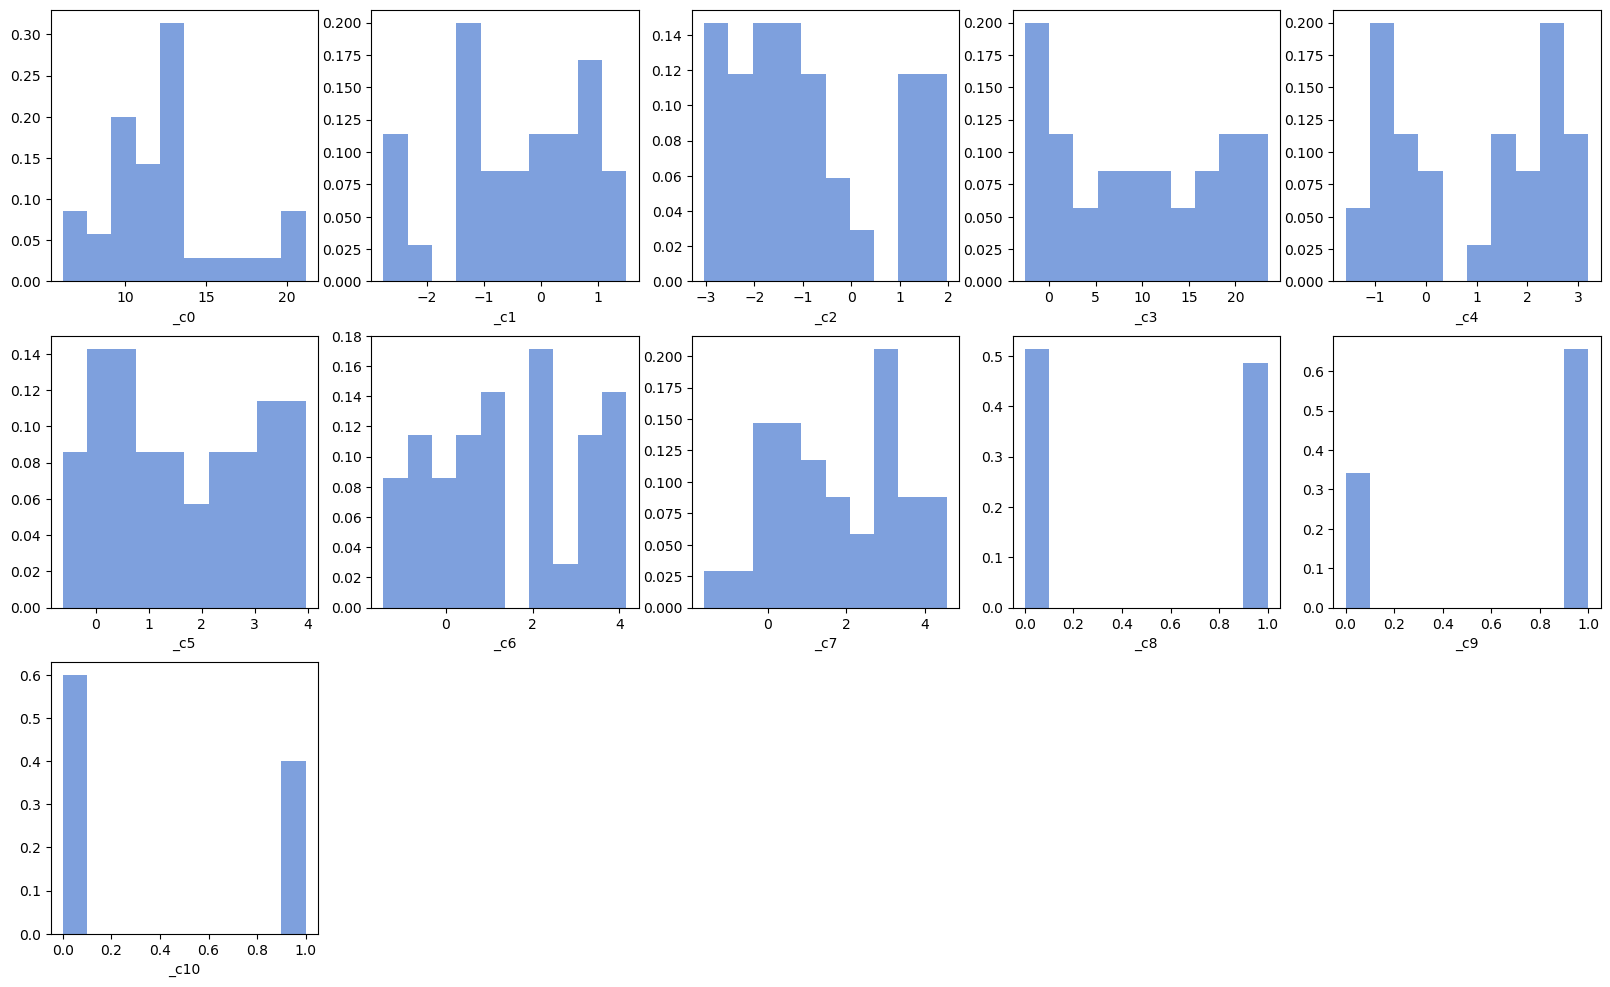

In [26]:
mu.show_distributions(features)

### Execution Stats vs Baseline

,num_present,num_missing,mean,sum,std_dev,min,max
_c0,35,0,12.375304,433.135648,3.738416,6.154875,21.161289
_c1,35,0,-0.421333,-14.746646,1.215417,-2.768217,1.508241
_c2,35,0,-0.810382,-28.363356,1.600916,-3.037566,1.973064
_c3,35,0,9.598659,335.953054,8.506703,-2.579303,23.460549
_c4,35,0,0.908757,31.806481,1.562916,-1.580565,3.199774
_c5,35,0,1.588933,55.612664,1.385937,-0.627512,3.964163
_c6,35,0,1.426507,49.927761,1.694070,-1.440147,4.164863
_c7,35,0,1.791996,62.719870,1.602505,-1.612888,4.555851
_c8,35,0,0.485714,17.000000,0.499796,0.000000,1.000000
_c9,35,0,0.657143,23.000000,0.474664,0.000000,1.000000


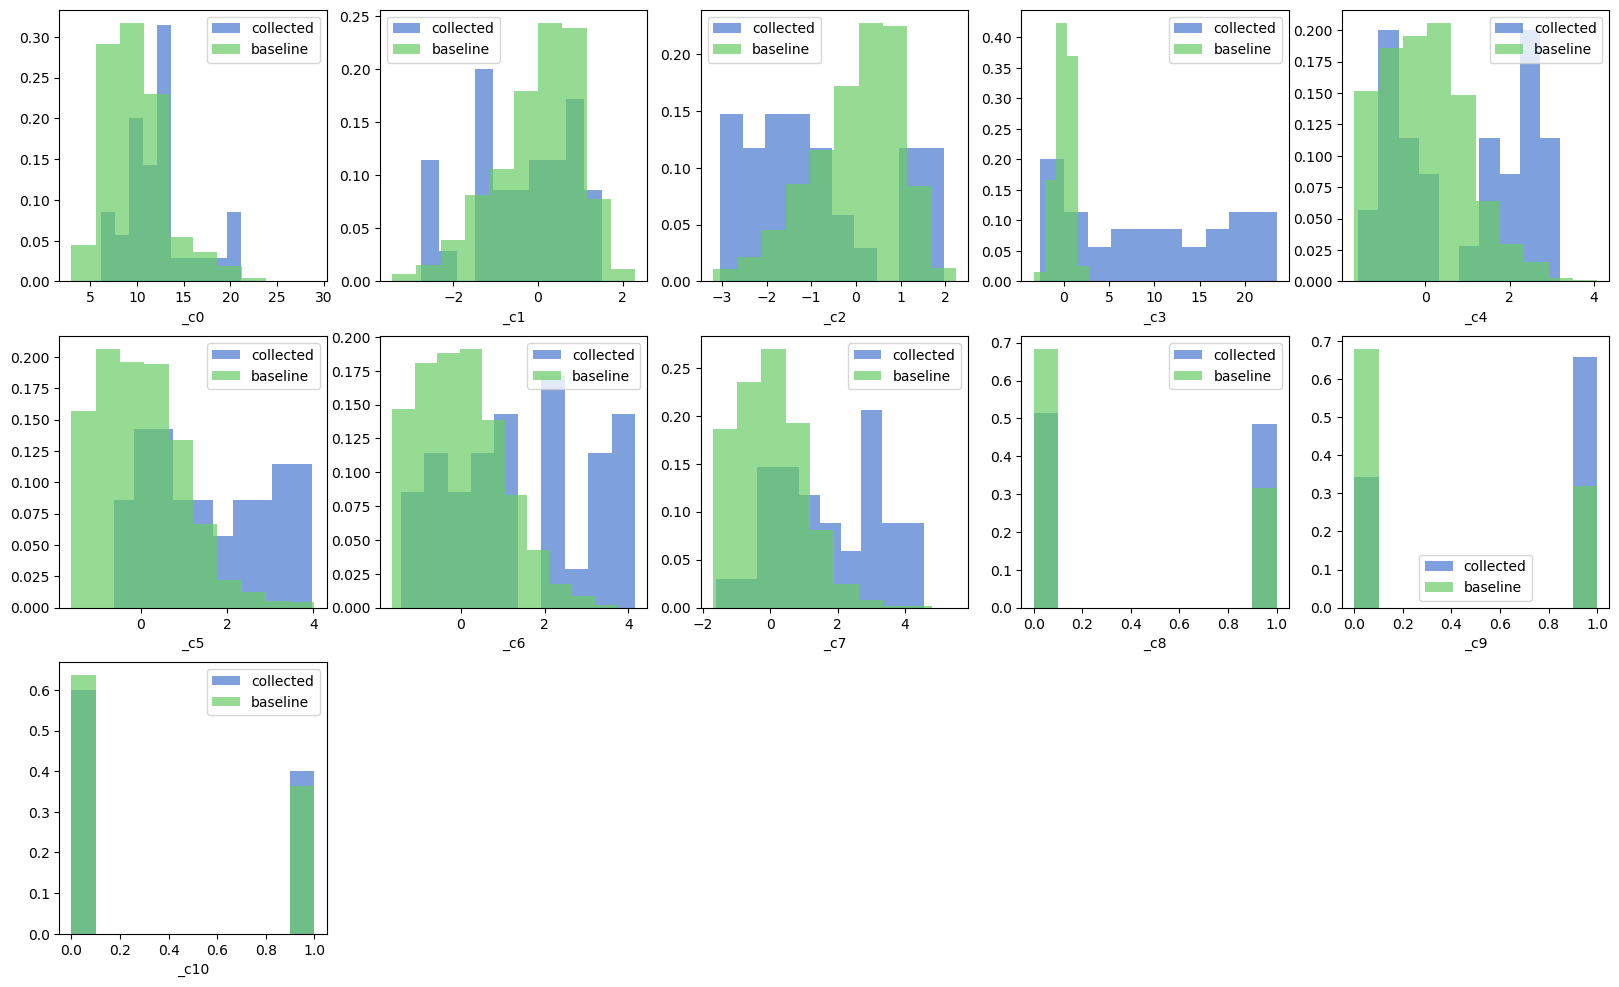

In [27]:
mu.show_distributions(features, feature_baselines)